# Исследование продаж компьютерных игр по всему миру

**Данные для исследования** — исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные в таблице представлены до 2016 года. Данные за 2016 год могут быть неполными.

**Ход исследования** — выполним предобработку данных и изучим их, чтобы найти интересные особенности и зависимости, которые существуют на рынке компьютерных игр.

## Общая информация о данных

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

!pip install jupyter-black
import jupyter_black

jupyter_black.load()
try:
    data = pd.read_csv("f:/Users/user/Desktop/Learn/project_4/games.csv")
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")

     |████████████████████████████████| 1.8 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 542 kB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


**Ознакомимся с общей информацией о полученном датафрейме.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В датафрейме 16715 строк и 11 столбцов. В некоторых столбцах количество значений различается. Значит, в данных есть пропуски.**

**Посмотрим первые 10 строк таблицы.**

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Посмотрим последние 10 строк таблицы.**

In [5]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Обратимся к статистическим характеристикам числовых данных.**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


**В статистические данные не попал столбец `User_Score`. Это связано в типом переменных в нем, изменим тип на этапе предобработки.**

In [7]:
# найдем пропущенные значения в данных
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [8]:
# оценим пропущенные значения в процентах
data.isna().mean().sort_values(ascending=False) * 100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

**Визуализируем пропуски с помощью библиотеки missingno.**

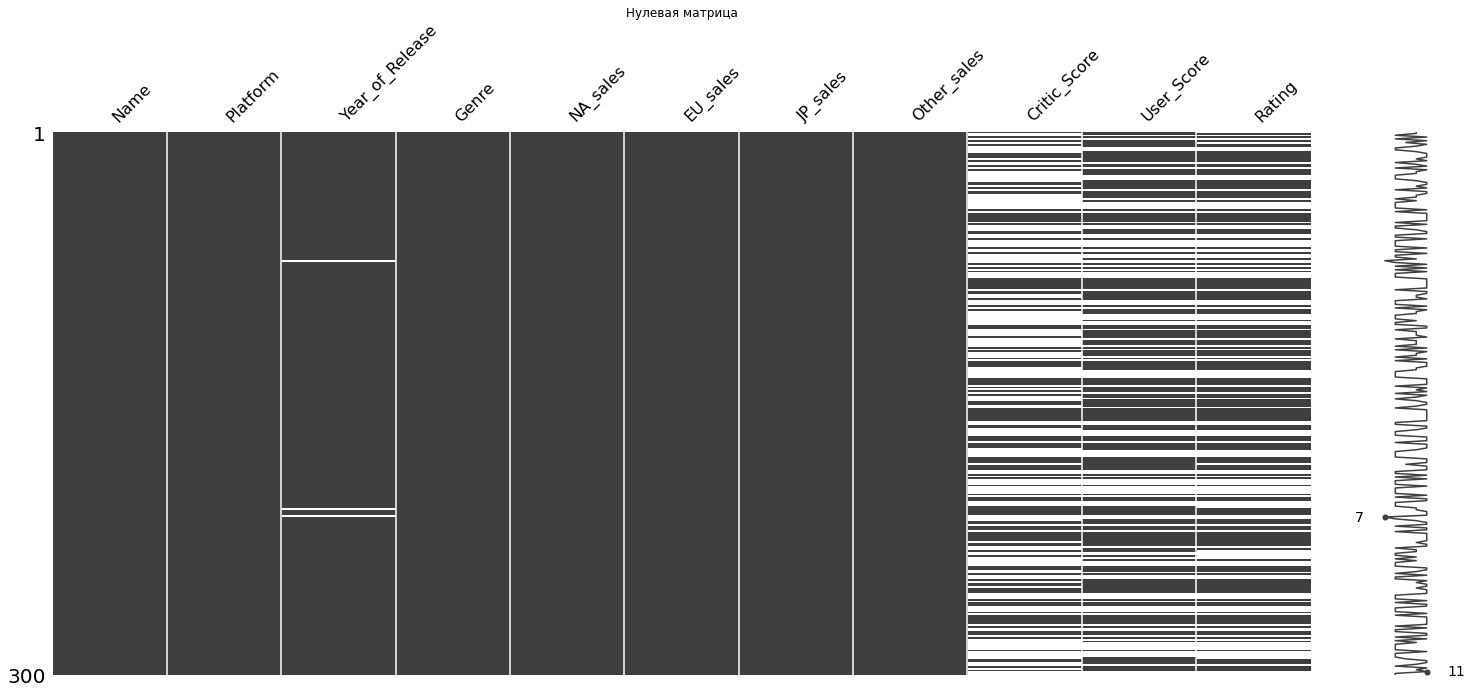

In [9]:
import missingno as msno

%matplotlib inline
msno.matrix(data.sample(300))
plt.title("Нулевая матрица")
plt.show()

**Визуализация демонстрирует, что большая часть пропущенных значений содержится в столбцах `critic_score`, `user_score`, `rating`, причем пропуски часто встречаются одновременно в трех столбцах.**

**Выводы:**

**В датафрейме 16715 строк и 11 столбцов.**
**В 6 столбцах из 11 есть пропущенные значения.**

В столбцах `name` и `genre` по 2 пропуска. Это незначительное количество не повлияет на результаты исследования, поэтому удалим их.

В столбце `year_of_release` 269 пропусков. Это меньше 5% от общего количества, поэтому удалим их.

В столбцах `critic_score`, `user_score`, `rating` пропусков более 40%. Займемся этими попусками на этапе предобработки данных.

## Предобработка данных

**Прежде чем приступать к исследованию данных, проведем их предобработку.**

Ознакомление с общими данными показало, что:
- необходимо привести названия столбцов к нижнему регистру;
- в даных есть пропущенные значения, обработаем их;
- тип данных в некоторых столбцах нужно изменить;
- необходимо проверить уникальные значения столбцов.

### Переименование столбцов

In [10]:
# переименуем столбцы: приведем их названия к нижнему регистру
data.columns = data.columns.str.lower()

In [11]:
# проверим результат
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропущенных значений и изменение типов данных

**Удалим пропущенные значения в столбцах `name`, `genre`, `year_of_release`**

Удалим пропущенные значения в столбце `name`.

In [12]:
data = data.dropna(subset=["name"])

In [13]:
# проверим результат
data["name"].isna().sum()

0

In [14]:
# посмотрим уникальные значения
data["name"].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Удалим пропущенные значения в столбце `genre`.

In [15]:
data = data.dropna(subset=["genre"])

In [16]:
# проверим результат
data["genre"].isna().sum()

0

In [17]:
# посмотрим уникальные значения
data["genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Удалим пропущенные значения в столбце `year_of_release`.

In [18]:
data = data.dropna(subset=["year_of_release"])

In [19]:
# проверим результат
data["year_of_release"].isna().sum()

0

In [20]:
# посмотрим уникальные значения
data["year_of_release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

**Изменим тип данных для столбца `year_of_release` на целое число, поскольку у этих данных не может быть десятичных знаков, с целым числом будет удобнее производить расчеты.**

In [21]:
data["year_of_release"] = data["year_of_release"].astype(int)

In [22]:
# проверим результат
data["year_of_release"]

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

**Посмотрим на уникальные значения столбца `critic_score`.**

In [23]:
data["critic_score"].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**На этапе просмотра общей информации в столбце `critic_score` обнаружено 8578 пропущенных значений. Поскольку заполнить оценку критиков медианным или средним значением будет не корректно, оставим эти пропуски.**

**Посмотрим на уникальные значения столбца `user_score`.**

In [24]:
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Среди значений рейтинга и пропущенных данных в столбце `user_score` встречается 'tbd'. Это означает «To Be Determined», то есть оценка будет определена позже. Логичнее заменить эти значения на пропуски.**

In [25]:
data["user_score"] = data["user_score"].replace("tbd", np.NaN)

In [26]:
# проверим результат
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**На этапе просмотра общей информации в столбце `user_score` обнаружено 6701 пропущенное значение. Поскольку заполнить оценку пользователей медианным или средним значением будет не корректно, оставим пропуски.**

**Чтобы производить расчеты со столбцом `user_score`, заменим тип данных в нем на тип float.**

In [27]:
data["user_score"] = data["user_score"].astype("float")

In [28]:
# проверим результат
data["user_score"]

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

**Посмотрим на уникальные значения столбца `rating`.**

In [29]:
data["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**На этапе просмотра общей информации в столбце `rating` обнаружено 6766 пропущенных значений. Этот столбцец содержит информацию о рейтинге от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Поскольку объективно заполнить эти пропуски не получится, оставляем их.**

**Так же среди уникальных значений в столбце `rating` присутствует оценка "K-A". Это аббревиатура использовалась до 1998 года. Означает то же, что и "E" - для всех. Поэтому заменим "K-A" на "E".**

In [30]:
# заменим "K-A" на "E"
data["rating"] = data["rating"].replace("K-A", "E")

In [31]:
# проверим результат
data["rating"].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64

**Проверим наличие явных дубликатов в данных.**

In [32]:
data.duplicated().sum()

0

In [33]:
# проверим наличие неявных дубликатов в столбцах name, year_of_release, platform
data[data.duplicated(subset=["name", "platform", "year_of_release"])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Обнаружен дубликат.

In [34]:
# рассмотрим подробнее строки Madden NFL 13
data.loc[data["name"] == "Madden NFL 13"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим строку 16230.

In [35]:
data = data.drop([16230]).reset_index(drop=True)

In [36]:
# проверим результат
data.loc[data["name"] == "Madden NFL 13"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


**Выводы**


На этапе предобработки проведены следующие действия:

- названия столбцов приведены к нижнему регистру;
- в столбцах `name`, `genre`, `year_of_release` удалены пропуски;
- в столбцах `year_of_release` и `user_score` изменены типы данных;
- в столбце `user_score` произведена замена значений 'tbd';
- в столбце `rating` произведена замена значений "K-A" на "E";
- пропуски в столбцах `critic_score`, `user_score`, `rating` оставлены;
- удален неявный дубликат. 

### Добавление столбца

**Создадим отдельный столбец `total_sales` с суммарными продажами по всем регионам.**

In [37]:
data["total_sales"] = data[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(
    axis=1
)

In [38]:
# проверим результат
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Выводы:**


На этапе предобработки проведены следующие действия:

- названия столбцов приведены к нижнему регистру;
- в столбцах `name`, `genre`, `year_of_release` удалены пропуски;
- в столбцах `year_of_release` и `user_score` изменены типы данных;
- в столбце `user_score` произведена замена значений 'tbd';
- в столбце `rating` произведена замена значений "K-A" на "E";
- пропуски в столбцах `critic_score`, `user_score`, `rating` оставлены;
- удален неявный дубликат;
- создан отдельный столбец `total_sales` с суммарными продажами по всем регионам.

**Возможными причинами пропусков в данных могли стать несколько факторов:**


- в датасете содержится информация с 1980 года, а рейтинг ESRB стал присваиваться с 1994 года. Это тоже может быть причиной возникновения пропусков в данных; 
- в данных содержится не вся информация за 2016 год, это тоже часть отсутствующих данных;
- так же игра может быть на старте своего выхода на рынок и не собрала еще достаточной обратной связи;
- традиционными причинами могли стать человеческий фактор и технические сбои: не все данные могли быть занесены и собраны или возможны сбои с оборудованием или программным обеспечением для сбора данных;
- возможно, игры сложно однозначно отнести к четкому возрастному ограничению (столбец `rating`) или у производителей игр нет жестких сроков присвоения рейтинга.

## Исследовательский анализ данных

**На этапе исследовательского анализа данных:**

- проанализируем сколько игр выпускалось в разные годы;
- посмотрим, как менялись продажи по платформам;
- узнаем какие платформы лидируют по продажам, растут или падают;
- увидим, как влияют на продажи отзывы пользователей и критиков;
- определим популярные жанры игр.

Визуализируем исследования и построим графики.

### Выпуск игр в разные годы

**Проанализируем сколько игр выпускалось в разные годы.**

In [39]:
# получим статистичечкие данные столбца 'year_of_release'
data["year_of_release"].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [40]:
# посмотрим на количество вышедших игр по годам
data["year_of_release"].value_counts().sort_index(ascending=True)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

**Для наглядности построим гистограмму распределения количества игр в разные годы.**

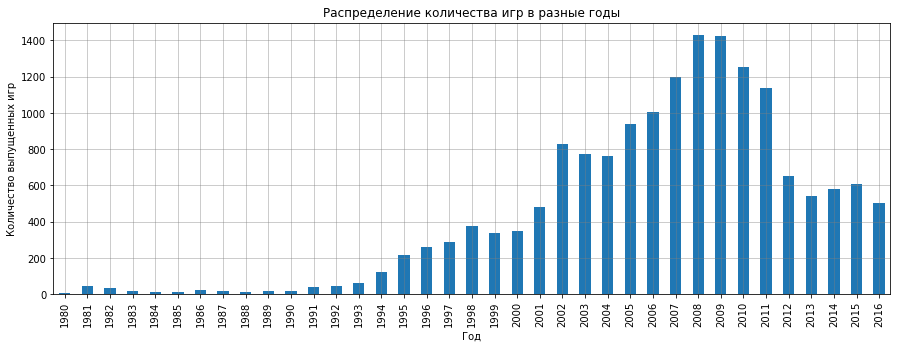

In [41]:
data["year_of_release"].value_counts().sort_index(ascending=True).plot.bar(
    figsize=(15, 5)
)
plt.title("Распределение количества игр в разные годы")
plt.xlabel("Год")
plt.ylabel("Количество выпущенных игр")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

**На графике видно, что самое большое количество игр было выпущено с 2005 по 2011 годы. Пиковые года - 2008 и 2009.**

Рынок компьютерных игр очень изменчив и зависит от трендов. Например, на популярность игр влияет популярность тех или иных устройств. Общий тренд на онлайн-игры, рост мобильного трафика и доступности интернета так же влияют на производителей.


**Данные за все годы, возможно, могут пригодиться для истории. Для анализа такого изменчивого рынка, вероятнее всего, важны наиболее свежие данные за 2-3 года. Поскольку за 2016 год в датасете есть не вся информация, будем использовать период 2014 - 2016 гг.**

### Анализ продаж по платформам

**Посмотрим, как менялись продажи по платформам.**

In [42]:
# построим сводную таблицу общих продаж по каждой платформе
data_pivot_platform = (
    data.pivot_table(index="platform", values="total_sales", aggfunc="sum")
    .sort_values("total_sales", ascending=False)
    .head(10)
)

In [43]:
# выведем первые 10 платформ с сортировкой по убыванию общих продаж
data_pivot_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


**Построим график распределения общих продаж по каждой платформе за все годы.**

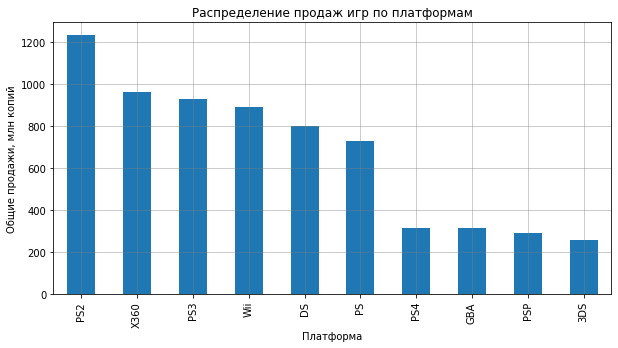

In [44]:
data_pivot_platform.plot.bar(figsize=(10, 5), legend=False)
plt.title("Распределение продаж игр по платформам")
plt.xlabel("Платформа")
plt.ylabel("Общие продажи, млн копий")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

**Из графика видно, что топ-6 платформ по продажам: PS2, X360, PS3, Wii, DS, PS. Продажи по каждой из этих платформ более 600 млн копий.**

Для платофрмы PS2 продано более 1200 млн копий игр. Это явный лидер. Меньше всего объемы продаж у платформ PS4, GBA, PSP, 3DS.

**Построим сводную таблицу общих продаж по всем годам и платформам.**

In [45]:
pivot_platform_years_all = data.pivot_table(
    index="platform", columns="year_of_release", values="total_sales", aggfunc="sum"
)

In [46]:
# проверим результат
pivot_platform_years_all.head(5)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN


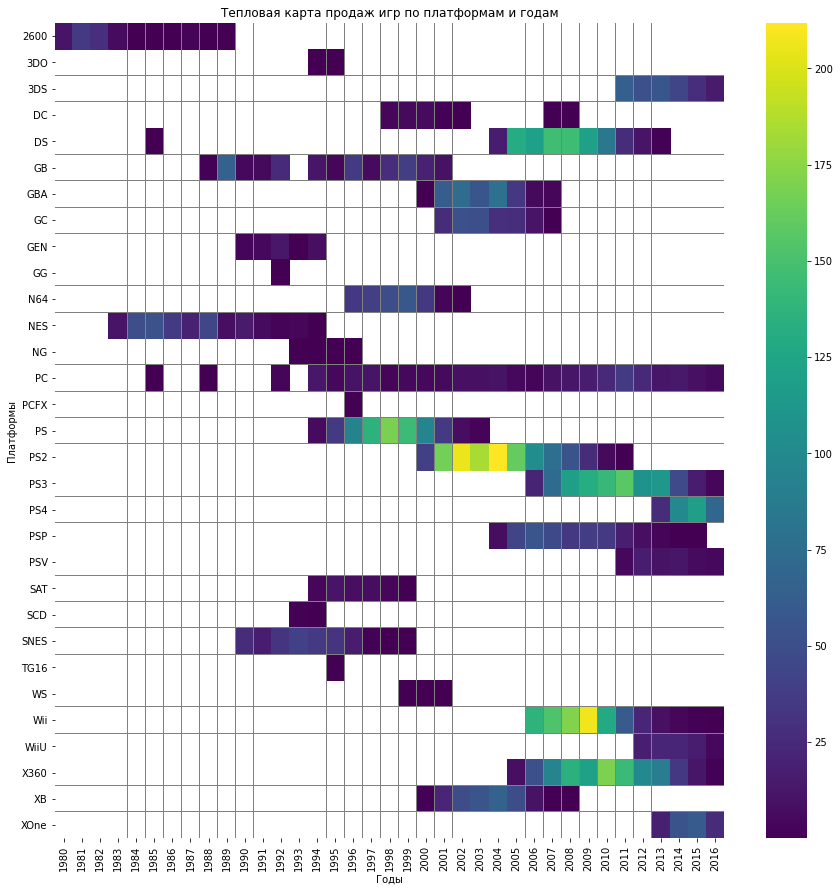

In [47]:
# построим тепловую карту для сводной таблицы
plt.figure(figsize=(15, 15))
sns.heatmap(
    pivot_platform_years_all, linewidths=0.003, linecolor="grey", cmap="viridis"
)
plt.title("Тепловая карта продаж игр по платформам и годам")
plt.xlabel("Годы")
plt.ylabel("Платформы")
plt.show()

**Построим распределение по годам платформ с наибольшими суммарными продажами.**

In [48]:
# сохраним в переменную топ-6 платформ
platform_top6 = data_pivot_platform.head(6)

In [49]:
# создадим сводную таблицу по топ-6 платформам по годам и продажам.
pivot_platform_years = data.query("platform in @platform_top6.index").pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

In [50]:
# проверим результат
pivot_platform_years

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


**Построим распределение по годам платформ с наибольшими суммарными продажами.**

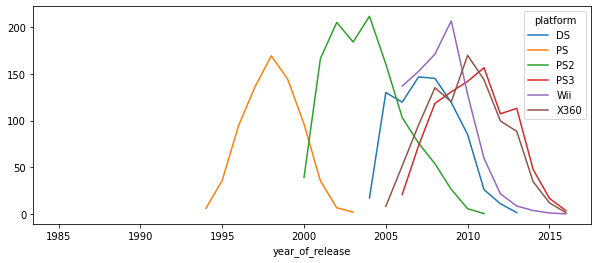

In [53]:
pivot_platform_years.plot(figsize=(10, 4))
plt.show()

**Из графика видно, что каждая платформа проходит жизненный цикл: этап выхода на рынок, пик продаж и исчезновение.**

Так же из графика заметно, что с момента появления платформы до ее исчезновения проходит 10-12 лет. В последние годы существования платфом наблюдается спад продаж по всем платформам.
Актуальность платформ DS, PS, PS2, Wii прошла.

### Актуальность данных

**Возьмем для исследования данные за актуальный период: 2014 - 2016 годы.**

In [54]:
# сохраним датафрейм со строками с 2014 года и выше
good_data = data.query("year_of_release>=2014").copy()

In [55]:
# проверим результат
good_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [56]:
# посмотрим на количество строк в новом датафрейме
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


**Построим сводную таблицу продаж игр по платформам за период 2014-2016 гг.**

In [57]:
good_data_pivot_platform = good_data.pivot_table(
    index="platform", columns="year_of_release", values="total_sales", aggfunc="sum"
)

In [58]:
# проверим результат
good_data_pivot_platform

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


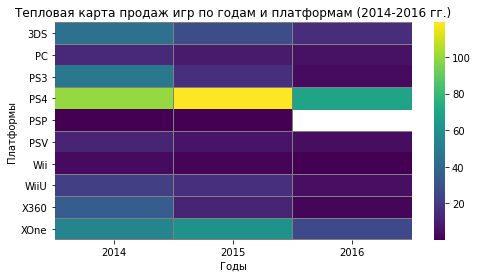

In [59]:
# построим тепловую карту для сводной таблицы
plt.figure(figsize=(8, 4))
sns.heatmap(
    good_data_pivot_platform, linewidths=0.003, linecolor="grey", cmap="viridis"
)
plt.title("Тепловая карта продаж игр по годам и платформам (2014-2016 гг.)")
plt.xlabel("Годы")
plt.ylabel("Платформы")
plt.show()

**Наиболее потенциальные платформы для прогноза на 2017 год - платформы PS4 или XOne. Поскольку только у этих двух платформ в 2016 году продажи игр превысили 20 млн копий.**

Все остальные платформы на финише своего жизненного цикла.

**Построим график распределения игр по платформам.**

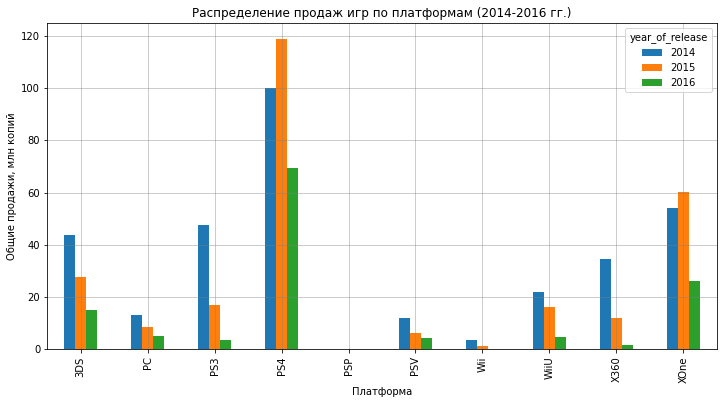

In [60]:
good_data_pivot_platform.plot(kind="bar", figsize=(12, 6))
plt.title("Распределение продаж игр по платформам (2014-2016 гг.)")
plt.xlabel("Платформа")
plt.ylabel("Общие продажи, млн копий")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

**За актуальный период лидеры продаж (более 100 млн копий) платформы: PS4 и XOne.**

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

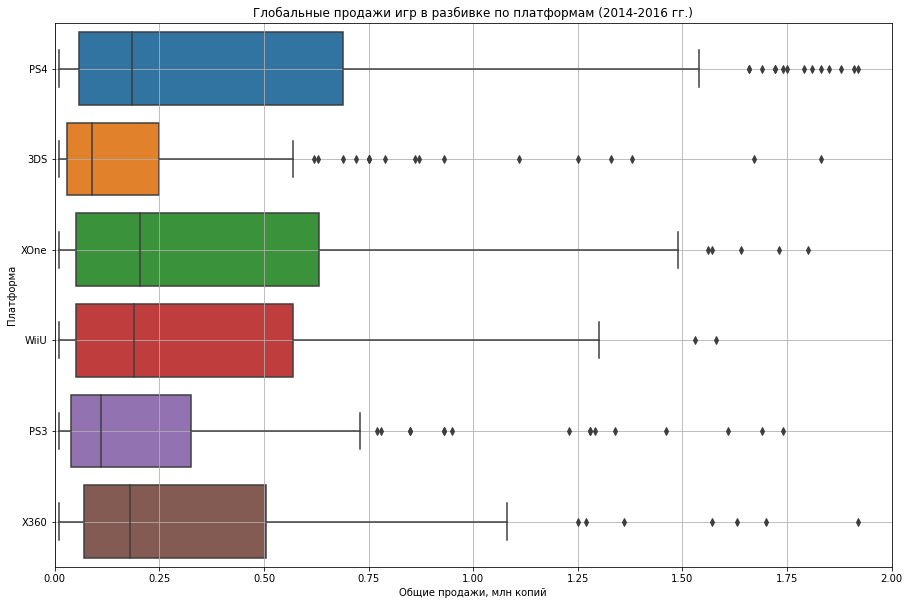

In [61]:
plt.figure(figsize=(15, 10))
plt.xlim(0, 2)
sns.boxplot(
    x="total_sales",
    y="platform",
    data=good_data.query("platform == ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']"),
)
plt.title("Глобальные продажи игр в разбивке по платформам (2014-2016 гг.)")
plt.ylabel("Платформа")
plt.xlabel("Общие продажи, млн копий")
plt.grid(True)
plt.show()

**Столбчатая диаграмма показывает суммарные продажи всех игр по платформам. То есть в сумме PS4, XOne, 3DS, PS3 продали очень много игр. 
Боксплоты же больше показывают "индивидуальные" значения. То есть в среднем игры для платформы Wii продаются хорошо. Но, видимо, их выходит не так много как для PS4 и XOne, поэтому их суммарные продажи меньше.**

**Выводы:**

**Наиболее потенциальные платформы для прогноза на 2017 год - платформы PS4 или XOne. Для аннализа данных используем актуальный период в 3 года: с 2014 по 2016 гг.**

### Взаимосвязь между отзывами и продажами

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и узнаем корреляцию между отзывами и продажами.**

In [62]:
# создадим отдельную перемнную для данных только по платформе PS4
good_data_ps4 = good_data[good_data["platform"] == "PS4"]

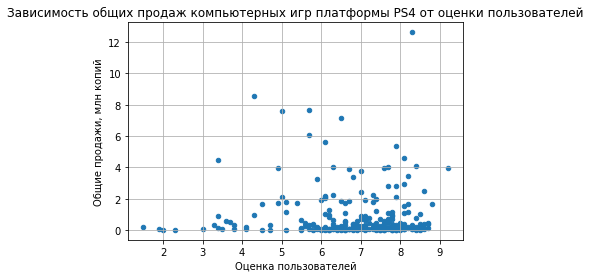

In [63]:
# выведем таблицу рассеяния по платформе PS4, отобразив отзывы пользователей
good_data_ps4.plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title(
    "Зависимость общих продаж компьютерных игр платформы PS4 от оценки пользователей"
)
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка пользователей")
plt.show()

In [64]:
# посчитаем коэффициент корреляции между общими продажами и отзывами пользователей
good_data_ps4["user_score"].corr(good_data_ps4["total_sales"]).round(2)

-0.04

**Коэфициент Пирсона -0,04 говорит об очень слабой отрицательной зависимости общих продаж игр для платформы PS4 от оценок пользователей.**

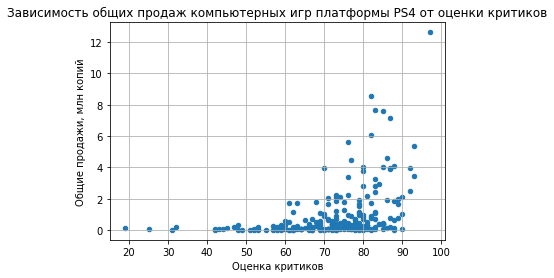

In [65]:
# выведем таблицу рассеяния по платформе PS4, отобразив отзывы критиков
good_data_ps4.plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title("Зависимость общих продаж компьютерных игр платформы PS4 от оценки критиков")
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка критиков")
plt.show()

In [66]:
# посчитаем коэффициент корреляции между общими продажами и отзывами критиков
good_data_ps4["critic_score"].corr(good_data_ps4["total_sales"]).round(2)

0.4

**Коэфициент Пирсона 0,4 говорит о наличие неярко выраженной положительной зависимости общих продаж игр для платформы PS4 от оценок критиков.**

**Соотнесем выводы с продажами игр на других платформах.**

Построим графики рассеяния и посчитаем коэффициенты корреляции для других платформ: PS3, XOne, 3DS.

**Построим графики рассеяния и посчитаем коэффициенты корреляции для платформы PS3.**

In [67]:
# создадим отдельную перемнную для данных только по платформе PS3
good_data_ps3 = good_data[good_data["platform"] == "PS3"]

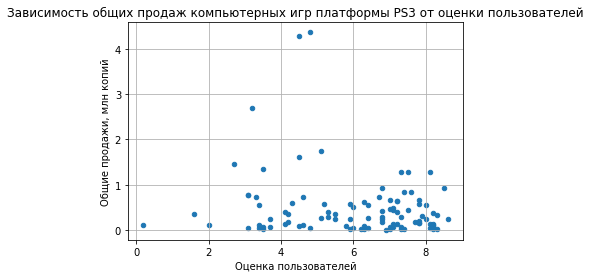

In [68]:
# выведем таблицу рассеяния по платформе PS3, отобразив отзывы пользователей
good_data_ps3.plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title(
    "Зависимость общих продаж компьютерных игр платформы PS3 от оценки пользователей"
)
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка пользователей")
plt.show()

In [69]:
# посчитаем коэффициент корреляции между общими продажами и отзывами пользователей
good_data_ps3["user_score"].corr(good_data_ps3["total_sales"]).round(2)

-0.17

**Коэфициент Пирсона -0,17 говорит о слабой отрицательной зависимости общих продаж игр для платформы PS3 от оценок пользователей.**

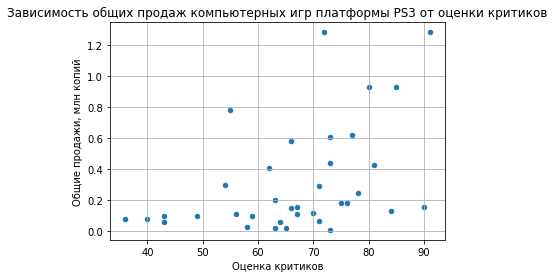

In [70]:
# выведем таблицу рассеяния по платформе PS3, отобразив отзывы критиков
good_data_ps3.plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title("Зависимость общих продаж компьютерных игр платформы PS3 от оценки критиков")
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка критиков")
plt.show()

In [71]:
# посчитаем коэффициент корреляции между общими продажами и отзывами критиков
good_data_ps3["critic_score"].corr(good_data_ps3["total_sales"]).round(2)

0.45

**Коэфициент Пирсона 0,45 говорит о наличие неярко выраженной положительной зависимости общих продаж игр для платформы PS3 от оценок критиков.**

**Построим графики рассеяния и посчитаем коэффициенты корреляции для платформы XOne.**

In [72]:
# создадим отдельную перемнную для данных только по платформе XOne
good_data_xone = good_data[good_data["platform"] == "XOne"]

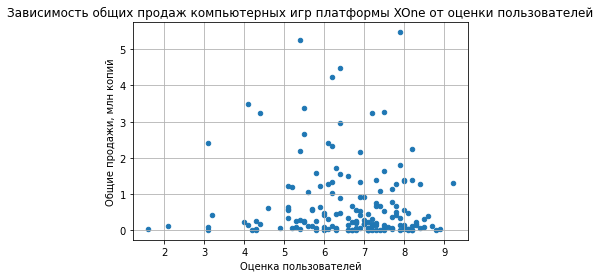

In [73]:
# выведем таблицу рассеяния по платформе XOne, отобразив отзывы пользователей
good_data_xone.plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title(
    "Зависимость общих продаж компьютерных игр платформы XOne от оценки пользователей"
)
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка пользователей")
plt.show()

In [74]:
# посчитаем коэффициент корреляции между общими продажами и отзывами пользователей
good_data_xone["user_score"].corr(good_data_xone["total_sales"]).round(2)

-0.07

**Коэфициент Пирсона -0,07 говорит об очень слабой отрицательной зависимости общих продаж игр для платформы XOne от оценок пользователей.**

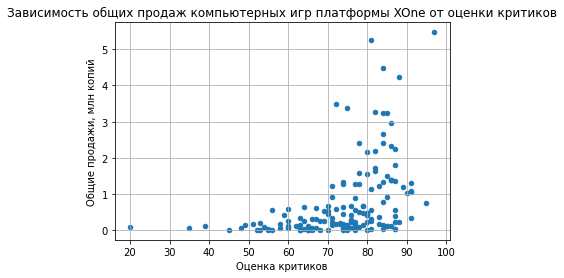

In [75]:
# выведем таблицу рассеяния по платформе XOne, отобразив отзывы критиков
good_data_xone.plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title("Зависимость общих продаж компьютерных игр платформы XOne от оценки критиков")
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка критиков")
plt.show()

In [76]:
# посчитаем коэффициент корреляции между общими продажами и отзывами критиков
good_data_xone["critic_score"].corr(good_data_xone["total_sales"]).round(2)

0.43

**Коэфициент Пирсона 0,43 говорит о наличие неярко выраженной положительной зависимости общих продаж игр для платформы XOne от оценок критиков.**

**Построим графики рассеяния и посчитаем коэффициенты корреляции для платформы 3DS.**

In [77]:
# создадим отдельную перемнную для данных только по платформе 3DS
good_data_3ds = good_data[good_data["platform"] == "3DS"]

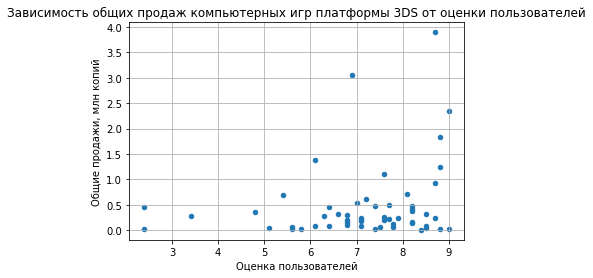

In [78]:
# выведем таблицу рассеяния по платформе 3DS, отобразив отзывы пользователей
good_data_3ds.plot(
    x="user_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title(
    "Зависимость общих продаж компьютерных игр платформы 3DS от оценки пользователей"
)
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка пользователей")
plt.show()

In [79]:
# посчитаем коэффициент корреляции между общими продажами и отзывами пользователей
good_data_3ds["user_score"].corr(good_data_3ds["total_sales"]).round(2)

0.22

**Коэфициент Пирсона 0,22 говорит о наличие слабой положительной зависимости общих продаж игр для платформы 3DS от оценок пользователей.**

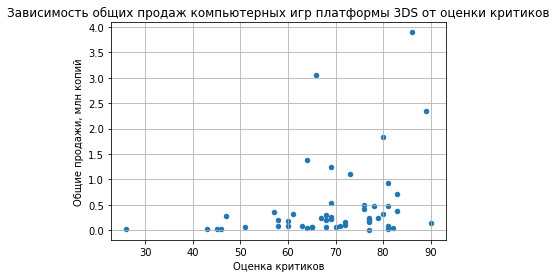

In [80]:
# выведем таблицу рассеяния по платформе 3DS, отобразив отзывы критиков
good_data_3ds.plot(
    x="critic_score",
    y="total_sales",
    kind="scatter",
    grid=True,
)
plt.title("Зависимость общих продаж компьютерных игр платформы 3DS от оценки критиков")
plt.ylabel("Общие продажи, млн копий")
plt.xlabel("Оценка критиков")
plt.show()

In [81]:
# посчитаем коэффициент корреляции между общими продажами и отзывами критиков
good_data_3ds["critic_score"].corr(good_data_3ds["total_sales"]).round(2)

0.31

**Коэфициент Пирсона 0,31 говорит о наличие слабой положительной зависимости общих продаж игр для платформы 3DS от оценок критиков.**

**Выводы:**

**Таким образом, у трех платформ PS4, PS3, XOne зависимость от оценок пользователей отрицательная практически отсутствующая, у 3DS положительная слабая.
Зависимость продаж от оценок критиков у трех платформ практически одинаковая положительная неярко выраженная, у 3DS немного меньше.**

Оценки пользователей практически не влиляют на продажи игр, оценки критиков оказывают небольшое влияние.

### Распределение продаж игр по жанрам

**Посмотрим на общее распределение игр по жанрам.**

In [82]:
# сформируем сводную таблицу общих продаж игр по жанрам
# good_data_pivot_genre = good_data.pivot_table(
#    index="genre", values="total_sales", aggfunc="sum"
# ).sort_values("total_sales", ascending=False)

In [83]:
# сформируем сводную таблицу продаж (используем средние значения) игр по жанрам
good_data_pivot_genre = good_data.pivot_table(
    index="genre", values="total_sales", aggfunc="mean"
).sort_values("total_sales", ascending=False)

In [84]:
# проверим результат
good_data_pivot_genre

,total_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


**Построим график распределения игр по жанрам.**

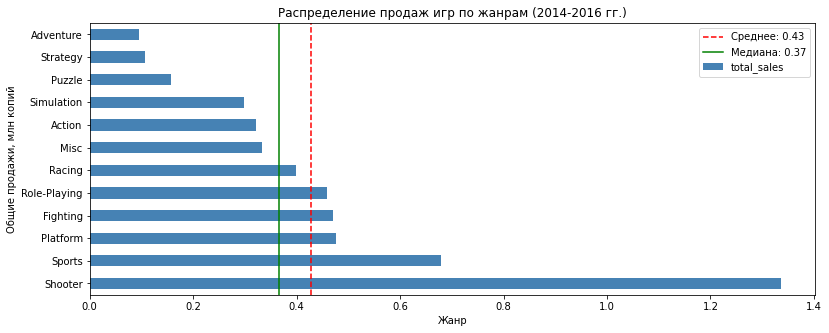

In [85]:
good_data_pivot_genre["total_sales"].plot(
    kind="barh", figsize=(13, 5), color="steelblue"
)
plt.title("Распределение продаж игр по жанрам (2014-2016 гг.)")
plt.xlabel("Жанр")
plt.ylabel("Общие продажи, млн копий")
mean_sales = good_data_pivot_genre["total_sales"].mean()
median_sales = good_data_pivot_genre["total_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Из графика видно, что больше всего игр продается в жанре Shooter.  Так же выше среднего продажи у игр в жанре Sports, Platform, Fighting, Role-Playing.**

Есть жанры и с низкими продажами: Adventure и Strategy.

In [86]:
# **Из графика видно, что больше всего игр продается в жанре Acton.  Так же выше среднего продажи у игр в жанре Shooter, Sports, Role-Playing.**

# Есть жанры и с низкими продажами: Puzzle и Strategy.

## Портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Топ-5 самых популярных платформ для каждого региона

**Построим сводную таблицу продаж игр по платформам в Северной Америке (NA).**

In [87]:
# построим сводную таблицу продаж игр по платформам
pivot_platform_na = (
    good_data.pivot_table(index="platform", values=["na_sales"], aggfunc="sum")
    .sort_values("na_sales", ascending=False)
    .head(5)
)

In [88]:
# проверим результат
pivot_platform_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


**Построим график топ-5 популярных платформ в Северной Америке.**

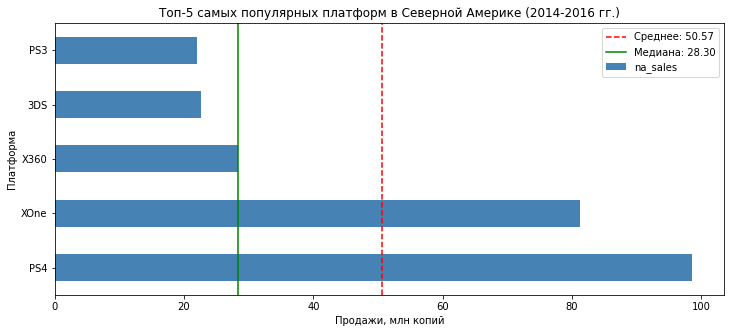

In [89]:
pivot_platform_na["na_sales"].plot(kind="barh", figsize=(12, 5), color="steelblue")
plt.title("Топ-5 самых популярных платформ в Северной Америке (2014-2016 гг.)")
plt.xlabel("Продажи, млн копий")
plt.ylabel("Платформа")
mean_sales = pivot_platform_na["na_sales"].mean()
median_sales = pivot_platform_na["na_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Лидеры-платформы в Северной Америке - PS4 и XOne.**


Продажи игр для этих платформ составили более 80 млн копий. Продажи для платформы X360 составили около 28 млн копий, что совпадает с медианным значением продаж по платформам в Северной Америке.
PS3 и 3DS наименее по популярности платформы.  

In [90]:
# создадим переменную и сохраним в ней цвета для графиков
colors = ["yellow", "Limegreen", "teal", "steelblue", "darkslateblue"]

**Для визуализации долей популярных платформ воспользуемся круговой диаграммой.**

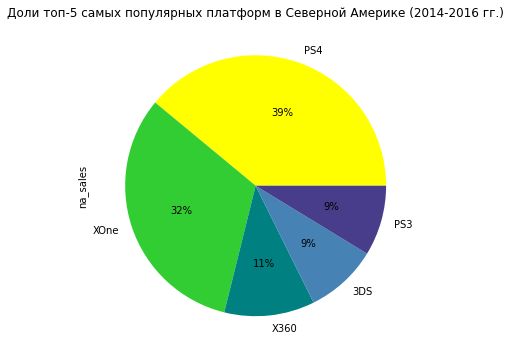

In [91]:
# построим круговую диаграмму
pivot_platform_na["na_sales"].plot(
    kind="pie", figsize=(6, 6), autopct="%1.0f%%", colors=colors
)
plt.title("Доли топ-5 самых популярных платформ в Северной Америке (2014-2016 гг.)")
plt.show()

**Доли самых популярных платформ в Северной Америке PS4 и XOne занимают 39% и 32% соответственно.**


**Построим сводную таблицу продаж игр по платформам в Европе (EU).**

In [92]:
# построим сводную таблицу продаж игр по платформам
pivot_platform_eu = (
    good_data.pivot_table(index="platform", values=["eu_sales"], aggfunc="sum")
    .sort_values("eu_sales", ascending=False)
    .head(5)
)

In [93]:
# проверим результат
pivot_platform_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


**Построим график топ-5 популярных платформ в Европе.**

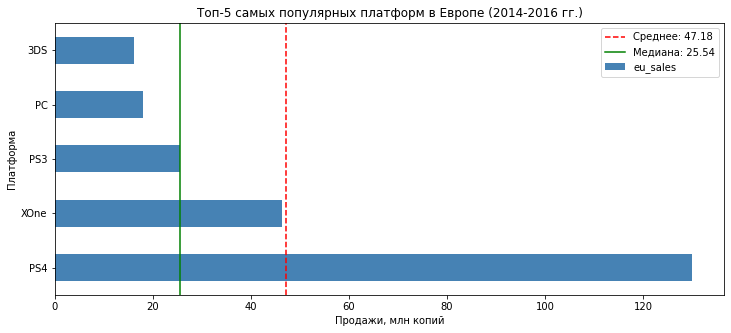

In [94]:
pivot_platform_eu["eu_sales"].plot(kind="barh", figsize=(12, 5), color="steelblue")
plt.title("Топ-5 самых популярных платформ в Европе (2014-2016 гг.)")
plt.xlabel("Продажи, млн копий")
plt.ylabel("Платформа")
mean_sales = pivot_platform_eu["eu_sales"].mean()
median_sales = pivot_platform_eu["eu_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Лидер-платформа с большим отрывом в Европе - PS4. На втором месте по продажам - XOne.**

Продажи игр для PS4 составили более 120 млн копий. Продажи для платформы XOne составили чуть ниже среднего значения продажи около 47 млн копий. Продажи платформ PS3, PC и 3DS намного меньше и ниже медианного значения.

**Для визуализации долей популярных платформ воспользуемся круговой диаграммой.**

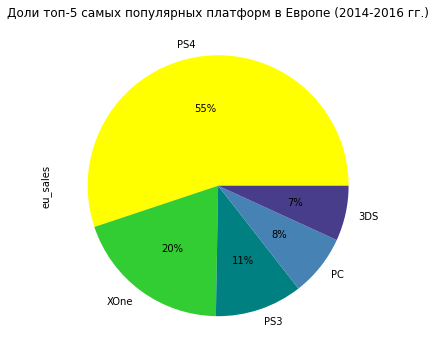

In [95]:
pivot_platform_eu["eu_sales"].plot(
    kind="pie", figsize=(6, 6), autopct="%1.0f%%", colors=colors
)
plt.title("Доли топ-5 самых популярных платформ в Европе (2014-2016 гг.)")
plt.show()

**Доля самой популярной платформы в Европе PS4 - 55%. На втором месте XOne - 20%.**

**Построим сводную таблицу продаж игр по платформам в Японии (JP).**

In [96]:
pivot_platform_jp = (
    good_data.pivot_table(index="platform", values=["jp_sales"], aggfunc="sum")
    .sort_values("jp_sales", ascending=False)
    .head(5)
)

In [97]:
# проверим результат
pivot_platform_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


**Построим график топ-5 популярных платформ в Японии.**

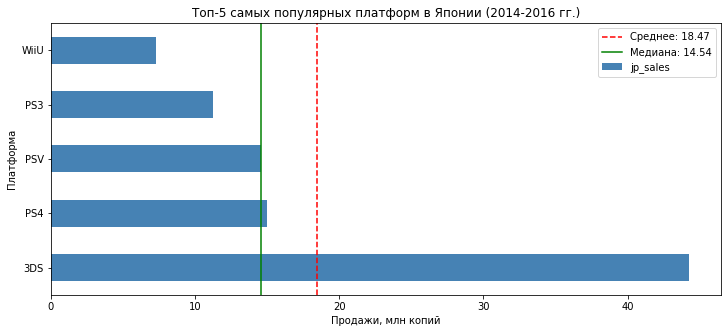

In [98]:
pivot_platform_jp["jp_sales"].plot(kind="barh", figsize=(12, 5), color="steelblue")
plt.title("Топ-5 самых популярных платформ в Японии (2014-2016 гг.)")
plt.xlabel("Продажи, млн копий")
plt.ylabel("Платформа")
mean_sales = pivot_platform_jp["jp_sales"].mean()
median_sales = pivot_platform_jp["jp_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Лидер-платформа с большим отрывом в Японии - 3DS. У платформ PS4 и PSV практически одинаковые объемы продаж. В целом объемы продаж игр в Японии ниже, чем в Европе и Северной Америке.**

Продажи игр для 3DS составили более 40 млн копий. Продажи для платформы PS4 и PSV составили ниже среднего значения, практически на уровне медианного - около 15 млн копий. Продажи платформ PS3 и WiiU намного меньше и ниже медианного значения.

**Для визуализации долей популярных платформ воспользуемся круговой диаграммой.**

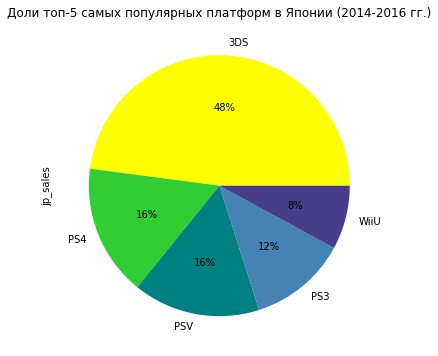

In [99]:
pivot_platform_jp["jp_sales"].plot(
    kind="pie", figsize=(6, 6), autopct="%1.0f%%", colors=colors
)
plt.title("Доли топ-5 самых популярных платформ в Японии (2014-2016 гг.)")
plt.show()

**Доля самой популярной платформы в Японии 3DS - 48%. На втором месте PS4 и PSV - по 16%.**

**Выводы:**

**Лидеры-платформы в Северной Америке - PS4 и XOne.** Затем следует платформа X360. PS3 и 3DS наименее по популярности платформы.

**Самая популярная платформа в Японии - 3DS.** На втором месте PS4 и PSV - по 16%. Продажи платформ PS3 и WiiU намного меньше.

**Лидер-платформа с большим отрывом в Европе - PS4.** На втором месте по продажам - XOne. Продажи платформ PS3, PC и 3DS намного меньше.

### Топ-5 самых популярных жанров для каждого региона

**Построим сводную таблицу продаж игр по жанрам в Северной Америке (NA).**

In [101]:
pivot_genre_na = (
    good_data.pivot_table(index="genre", values=["na_sales"], aggfunc="median")
    .sort_values("na_sales", ascending=False)
    .head(5)
)

In [102]:
# проверим результат
pivot_genre_na

,na_sales
genre,
Shooter,0.220
Platform,0.075
Sports,0.070
Fighting,0.040
Racing,0.030


**Построим график топ-5 популярных жанров в Северной Америке.**

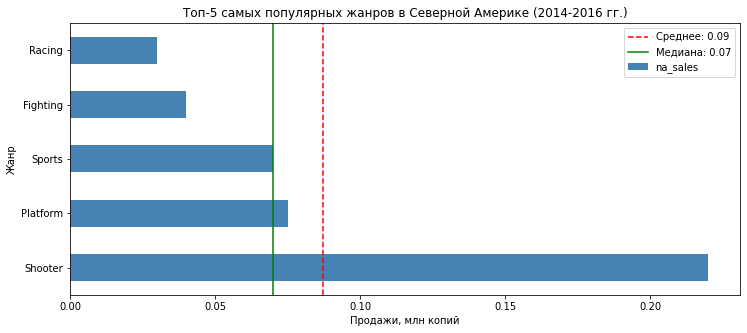

In [103]:
pivot_genre_na["na_sales"].plot(kind="barh", figsize=(12, 5), color="steelblue")
plt.title("Топ-5 самых популярных жанров в Северной Америке (2014-2016 гг.)")
plt.xlabel("Продажи, млн копий")
plt.ylabel("Жанр")
mean_sales = pivot_genre_na["na_sales"].mean()
median_sales = pivot_genre_na["na_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Самый популярный жанр в Северной Америке - Shooter. Затем идет жанр Platform. На третьем месте - жанр Sports.**

**Построим сводную таблицу продаж игр по платформам в Европе (EU).**

In [106]:
pivot_genre_eu = (
    good_data.pivot_table(index="genre", values=["eu_sales"], aggfunc="median")
    .sort_values("eu_sales", ascending=False)
    .head(5)
)

In [107]:
# проверим результат
pivot_genre_eu

,eu_sales
genre,
Shooter,0.220
Platform,0.055
Racing,0.050
Sports,0.050
Simulation,0.030


**Построим график топ-5 популярных жанров в Европе.**

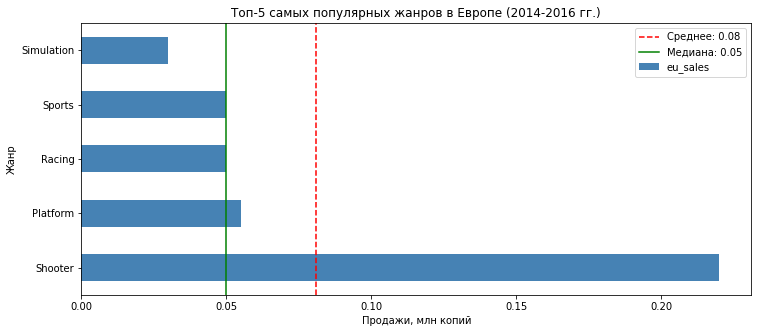

In [108]:
pivot_genre_eu["eu_sales"].plot(kind="barh", figsize=(12, 5), color="steelblue")
plt.title("Топ-5 самых популярных жанров в Европе (2014-2016 гг.)")
plt.xlabel("Продажи, млн копий")
plt.ylabel("Жанр")
mean_sales = pivot_genre_eu["eu_sales"].mean()
median_sales = pivot_genre_eu["eu_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Самый популярный жанр в Европе - Shooter. Далее идет жанр Platform. Одинаковы по полуярности жанры Racing и Sports.**

**Построим сводную таблицу продаж игр по жанрам в Японии (JP).**

In [111]:
pivot_genre_jp = (
    good_data.pivot_table(index="genre", values=["jp_sales"], aggfunc="median")
    .sort_values("jp_sales", ascending=False)
    .head(5)
)

In [112]:
# проверим результат
pivot_genre_jp

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Puzzle,0.03
Action,0.01
Adventure,0.01


**Построим график топ-5 популярных жанров в Японии.**

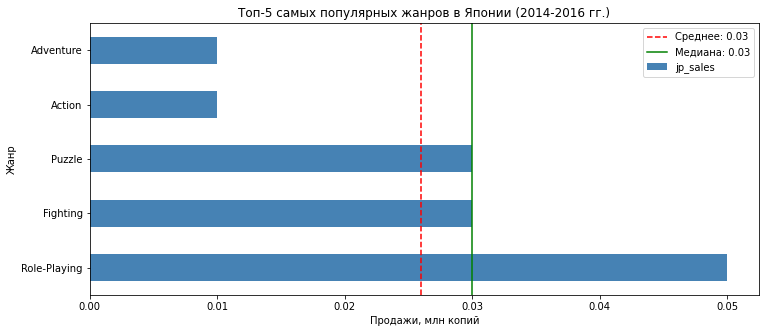

In [113]:
pivot_genre_jp["jp_sales"].plot(kind="barh", figsize=(12, 5), color="steelblue")
plt.title("Топ-5 самых популярных жанров в Японии (2014-2016 гг.)")
plt.xlabel("Продажи, млн копий")
plt.ylabel("Жанр")
mean_sales = pivot_genre_jp["jp_sales"].mean()
median_sales = pivot_genre_jp["jp_sales"].median()
plt.axvline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axvline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.legend()
plt.show()

**Самый популярный жанр в Японии c большим отрывом - Role-Playing. Затем примерно с одинаковыми сборами идут жанры Fighting и Puzzle.**

**Выводы:**

**Самый популярный жанр в Северной Америке - Shooter.** Затем идет жанр Platform. На третьем месте - жанр Sports.

**Самый популярный жанр в Европе - Shooter. Далее идет жанр Platform.** Одинаковы по полуярности жанры Racing и Sports.

**Самый популярный жанр в Японии c большим отрывом - Role-Playing.** Затем примерно с одинаковыми сборами идут жанры Fighting и Puzzle.

### Влияние рейтинга ESRB на продажи в регионах.

**Построим сводную таблицу продаж игр по рейтингу в Северной Америке (NA).**

In [115]:
pivot_rating_na = good_data.pivot_table(
    index="rating", values=["na_sales"], aggfunc="sum"
).sort_values("na_sales", ascending=False)

In [116]:
# проверим результат
pivot_rating_na

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


**Построим график распределения продаж по рейтингу в Северной Америке.**

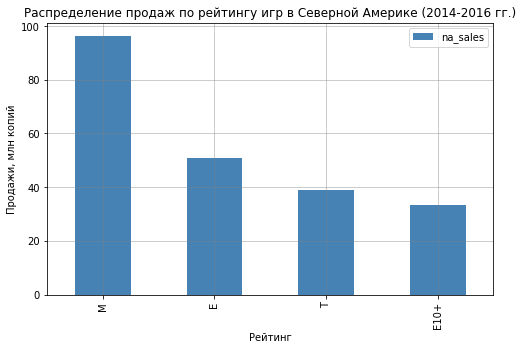

In [117]:
pivot_rating_na.plot(kind="bar", figsize=(8, 5), color="steelblue")
plt.title("Распределение продаж по рейтингу игр в Северной Америке (2014-2016 гг.)")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн копий")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

**Самые высокие продажи в Северной Америке у игр с рейтингом «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет.** 

Затем идут игры с рейтингом «E» («Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов), «T» («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет), «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»).

**Построим сводную таблицу продаж игр по рейтингу в Европе (EU).**

In [118]:
pivot_rating_eu = good_data.pivot_table(
    index="rating", values=["eu_sales"], aggfunc="sum"
).sort_values("eu_sales", ascending=False)

In [119]:
# проверим результат
pivot_rating_eu

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


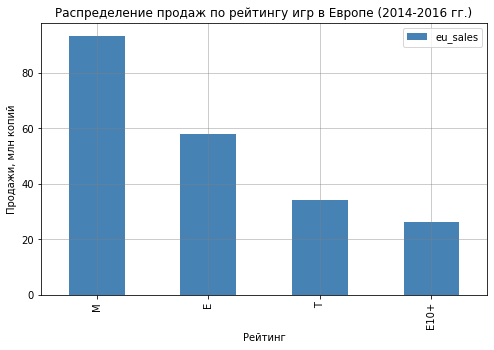

In [120]:
# построим график
pivot_rating_eu.plot(kind="bar", figsize=(8, 5), color="steelblue")
plt.title("Распределение продаж по рейтингу игр в Европе (2014-2016 гг.)")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн копий")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

**Самые высокие продажи в Европе у игр с рейтингом «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет.**

Затем идут игры с рейтингом «E» («Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов), «T» («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет), «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»).


Популярность рейтингов в Европе очень схожа с Северной Америкой.

**Построим сводную таблицу продаж игр по рейтингу в Японии (JP).**

In [121]:
pivot_rating_jp = good_data.pivot_table(
    index="rating", values=["jp_sales"], aggfunc="sum"
).sort_values("jp_sales", ascending=False)

In [122]:
# проверим результат
pivot_rating_jp

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


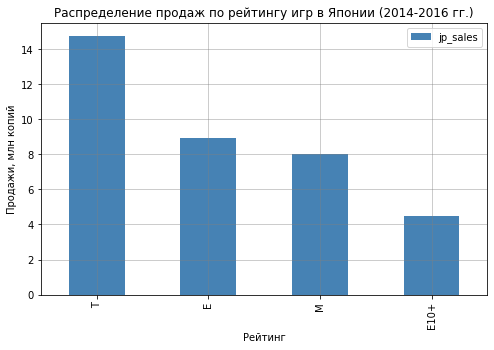

In [123]:
# построим график
pivot_rating_jp.plot(kind="bar", figsize=(8, 5), color="steelblue")
plt.title("Распределение продаж по рейтингу игр в Японии (2014-2016 гг.)")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн копий")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

**Самые высокие продажи в Японии у игр с рейтингом «T» («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет).**

Затем идут игры с рейтингом «E» («Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов), «M» («Mature» — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет), «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»).

**Построим общую сводную таблицу по всем регионам.**

In [124]:
pivot_rating = good_data.pivot_table(
    index="rating", values=["eu_sales", "na_sales", "jp_sales"], aggfunc="sum"
).sort_values(by=["eu_sales", "na_sales", "jp_sales"], ascending=False)

In [125]:
# для удобства переименуем столбцы
pivot_rating.columns = ["Европа", "Япония", "Северная Америка"]

In [126]:
# выведем на экран таблицу
pivot_rating

,Европа,Япония,Северная Америка
rating,,,
M,93.44,8.01,96.42
E,58.06,8.94,50.74
T,34.07,14.78,38.95
E10+,26.16,4.46,33.23


**Построим график по всем регионам.**

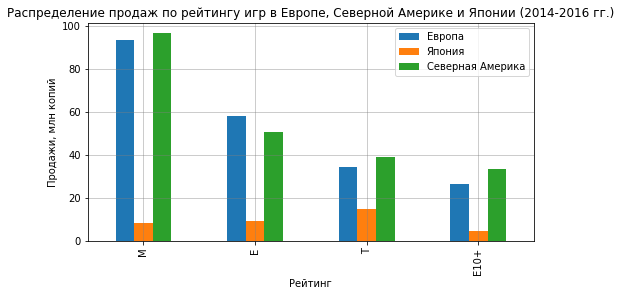

In [127]:
pivot_rating.plot.bar(figsize=(8, 4))
plt.title(
    "Распределение продаж по рейтингу игр в Европе, Северной Америке и Японии (2014-2016 гг.)"
)
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн копий")
plt.grid(color="grey", axis="both", alpha=0.5)
plt.show()

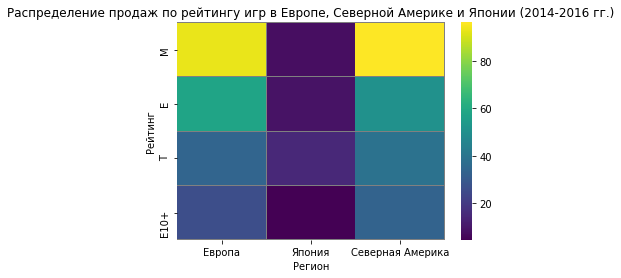

In [128]:
# построим тепловую карту для сводной таблицы
sns.heatmap(pivot_rating, linewidths=0.003, linecolor="grey", cmap="viridis")
plt.title(
    "Распределение продаж по рейтингу игр в Европе, Северной Америке и Японии (2014-2016 гг.)"
)
plt.xlabel("Регион")
plt.ylabel("Рейтинг")
plt.show()

**Тепловая карта подтверждает, что картина с популярностью рейтингов в Европе и в Северной Америке одинаковы: чаще продаются игры для взрослых. В Японии чаще продаются игры для подростков.**

**Выводы:**


**Самые высокие продажи в Европе у игр с рейтингом «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет.**
Затем идут игры с рейтингом «E» («Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов), «T» («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет), «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»).


**Самые высокие продажи в Японии у игр с рейтингом «T» («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет).**
Затем идут игры с рейтингом «E» («Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов), «M» («Mature» — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет), «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»).


**Самые высокие продажи в Северной Америке у игр с рейтингом «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет.**
Затем идут игры с рейтингом «E» («Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов), «T» («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет), «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»).

# 5. Общие выводы

**В ходе исследования были проанализированы исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**


**Была выполнена предобработка данных:**


- названия столбцов приведены к нижнему регистру;
- незначительная часть пропущенных значений была удалена;
- пропуски в данных, которые не возможно заменить объективно, сохранены;
- в двух столбцах произведена замена значений на актуальные;
- добавлен новый столбец с суммарными продажами по всем регионам.

В трех столбцах `critic_score`, `user_score`, `rating` более 40% пропусков. 


**Возможными причинами пропусков в данных могли стать несколько факторов:**


- в датасете содержится информация с 1980 года, а рейтинг ESRB стал присваиваться с 1994 года. Это может быть причиной возникновения пропусков в данных; 
- в данных содержится не вся информация за 2016 год, это тоже часть отсутствующих данных;
- так же игра может быть на старте своего выхода на рынок и не собрала еще достаточной обратной связи;
- традиционными причинами могли стать человеческий фактор и технические сбои: не все данные могли быть занесены и собраны или возможны сбои с оборудованием или программным обеспечением для сбора данных;
- возможно, игры сложно однозначно отнести к четкому возрастному ограничению или у производителей игр нет жестких сроков присвоения рейтинга.

**На этапе исследовательского анализа данных выявлены закономерности и особенности:**

- проанализировали сколько игр выпускалось в разные годы: **самое большое количество игр было выпущено с 2005 по 2011 годы. Пиковые года - 2008 и 2009**;
- изменения продаж по платформам за все года: **топ-6 платформ по продажам - PS2, X360, PS3, Wii, DS, PS**;
- выявлено, что **с момента появления платформы до ее исчезновения проходит 10-12 лет**;
- для анализа изменчивого рынка компьютерных игр был выбран **период в 3 года: с 2014 по 2016 гг**;
- **платформы PS4 или XOne наиболее перспективны**, поскольку они примерно в середине своего жизненного цикла. Все остальные платформы актуального периода на финише своего жизненного цикла;
- влияние на продажи отзывов пользователей и критиков: у трех платформ PS4, PS3, XOne зависимость от оценок пользователей отрицательная практически отсутствующая, у 3DS положительная слабая. Зависимость продаж от оценок критиков у трех платформ практически одинаковая положительная неярко выраженная, у 3DS немного меньше. **Оценки пользователей практически не влиляют на продажи игр, оценки критиков оказывают совсем небольшое влияние**;
- определили популярные жанры игр: **больше всего игр продается в жанре Shooter. Так же выше среднего продажи у игр в жанре Sports, Platform, Fighting, Role-Playing;**
- **визуализировали исследование с помощью графиков.**

  




**Сформировали портрет пользователя игр в Северной Америке, Европе и Японии.** 

**Большинство пользователей в Северной Америке** предпочитают платформы PS4 и XOne. Играют на этих платформах чаще всего в игры жанров Shooter и Action, так же многие пользователи выбирают жанры Platform и  Sports. Чаще всего пользователь взрослый, так же играют подростки и дети старше 10 лет.

**У большинства пользователей в Европе** схожие предпочтения по платформам: PS4 и XOne. Самый популярный жанр в Европе - Shooter, так же многие предпочитают жанр Platform. Чаще всего пользователь взрослый, так же играют подростки и дети старше 10 лет.

**В Японии большинство пользователей** выбирают платформу 3DS, затем по полуярности: PS4 и PSV. Чаще всего играют в игры жанров Role-Playing, так же некоторые пользователи предпочитают жанры Fighting и Puzzle.
Чаще всего играют подростки, так же играют взрослые и дети страше 10 лет.





**Рынок компьютерных игр очень изменчив и зависит от трендов. Например, на популярность игр влияет популярность тех или иных устройств. Общий тренд на онлайн-игры, рост мобильного трафика и доступности интернета тоже оказывают влияние на интересы пользователей. Так же производителям игр стоит обратить внимание на предпочтения пользователей в разных регионах, поскольку есть схожие по интересам, а есть сильно различающиеся по предпочтениям.**
